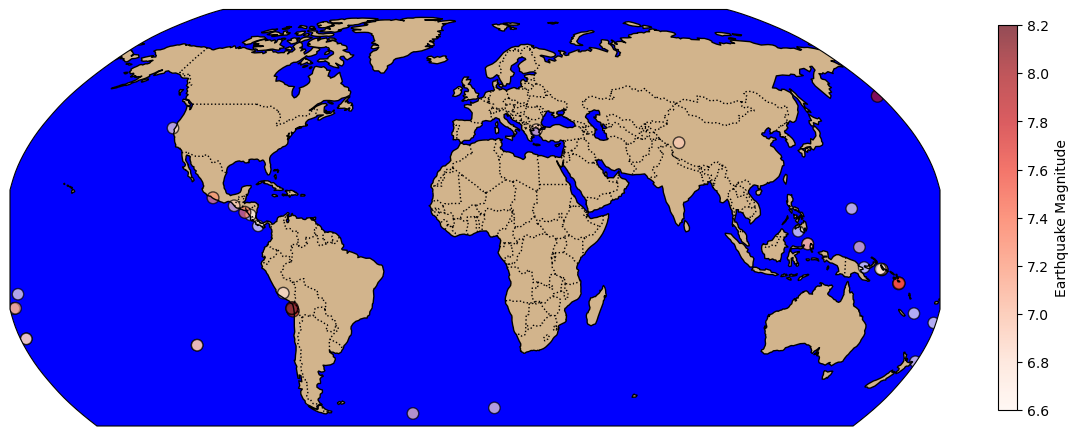

In [3]:
#1 In this problem set, we will use this file from the USGS Earthquakes Database. The dataset is similar to the one you use in Assignment 02. Use the file provided (usgs_earthquakes.csv) to recreate the following map. Use the mag column for magnitude.
import pandas as pd
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

# 读取地震数据
file_path = 'D:/GitKraken/ese5023/assignment/assignment4/usgs_earthquakes.csv'
df = pd.read_csv(file_path)

# 筛选震级在6.6到8.2之间的地震数据
df_filtered = df[(df['mag'] >= 6.6) & (df['mag'] <= 8.2)]

# 创建地图
fig, ax = plt.subplots(figsize=(15, 10), subplot_kw={'projection': ccrs.Robinson()})

# 设置地图的显示范围，这里以非洲、亚洲和美洲为中心
ax.set_extent([-180, 180, -60, 90], crs=ccrs.PlateCarree())

# 添加国家边界和海岸线
ax.add_feature(cfeature.BORDERS, linestyle=':')
ax.add_feature(cfeature.COASTLINE)

# 添加彩色的海洋和陆地
ax.add_feature(cfeature.OCEAN, facecolor='blue')
ax.add_feature(cfeature.LAND, facecolor='tan')

# 绘制地震点
scatter = ax.scatter(
    df_filtered['longitude'], df_filtered['latitude'], 
    c=df_filtered['mag'],  # 颜色由震级决定
    s=(df_filtered['mag']*10),  # 点的大小由震级决定，这里乘以10以便更明显
    cmap='Reds',  # 使用红色系颜色映射
    alpha=0.7,  # 透明度
    edgecolor='black',  # 点的边缘颜色
    transform=ccrs.PlateCarree()  # 坐标转换
)

# 添加颜色条
cbar = plt.colorbar(scatter, ax=ax, orientation='vertical', shrink=0.5, pad=0.05)
cbar.set_label('Earthquake Magnitude')

# 显示地图
plt.show()

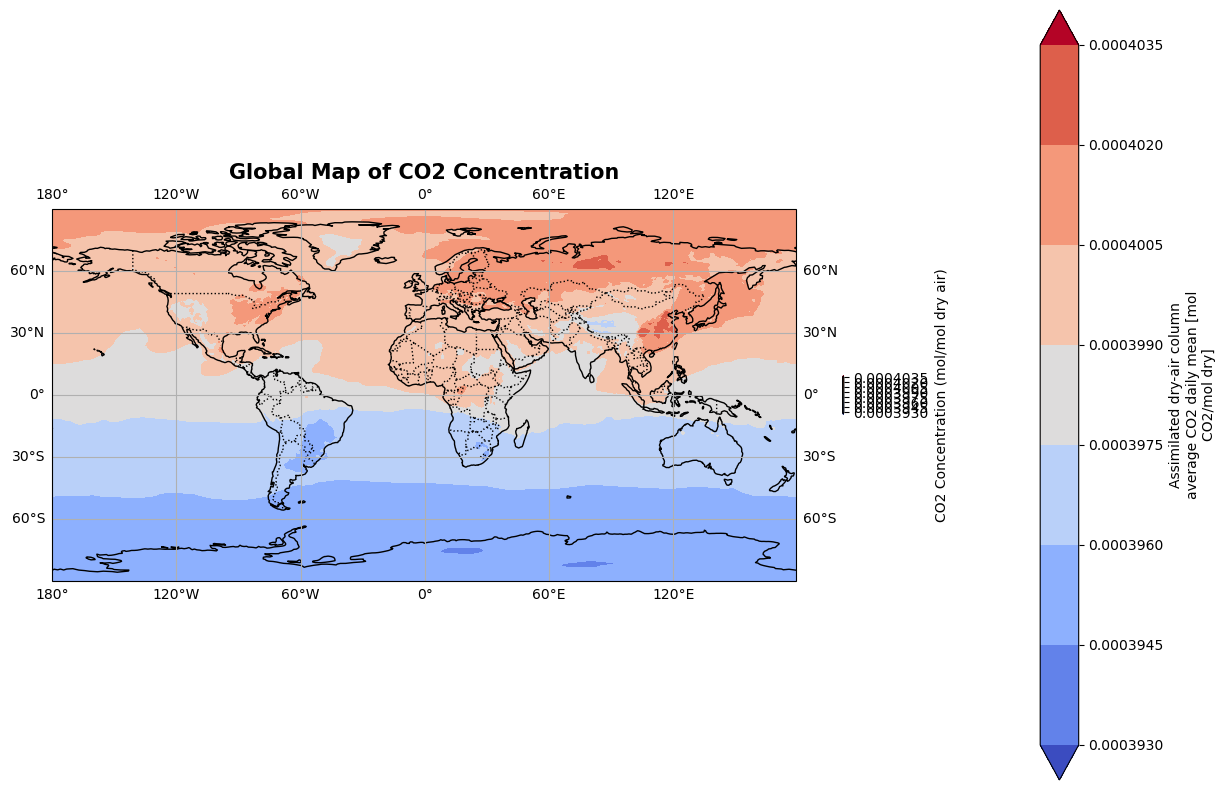

In [5]:
#2Explore a netCDF dataset
#2.1  Make a global map of a certain variable. Your figure should contain: a project, x label and ticks, y label and ticks, title, gridlines, legend, colorbar, masks or features, annotations, and text box (1 point each).
import xarray as xr
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

# 加载 NetCDF 文件
file_path = r'D:\GitKraken\ese5023\assignment\assignment4\output_file\oco2_GEOS_L3CO2_month_201501_B10206Ar.nc4'
ds = xr.open_dataset(file_path)

# 选择变量，并选择时间的第一个切片
variable = ds['XCO2'].sel(time=ds['time'].values[0])

# 创建地图
fig, ax = plt.subplots(figsize=(15, 10), subplot_kw={'projection': ccrs.PlateCarree()})

# 绘制变量
contourf = variable.plot.contourf(ax=ax, cmap='coolwarm', extend='both', transform=ccrs.PlateCarree())

# 添加特征：海岸线、国家边界、陆地和海洋
ax.coastlines()
ax.add_feature(cfeature.BORDERS, linestyle=':')
ax.add_feature(cfeature.LAND, facecolor='tan')
ax.add_feature(cfeature.OCEAN, facecolor='skyblue')

# 添加网格线
ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False)

# 添加颜色条
cbar = plt.colorbar(contourf, ax=ax, orientation='vertical', shrink=0.05, aspect=30)
cbar.set_label('CO2 Concentration (mol/mol dry air)')

# 添加标题
ax.set_title('Global Map of CO2 Concentration', fontsize=15, fontweight='bold')

# 添加坐标轴标签
ax.set_xlabel('Longitude', fontsize=12)
ax.set_ylabel('Latitude', fontsize=12)

# 显示地图
plt.show()

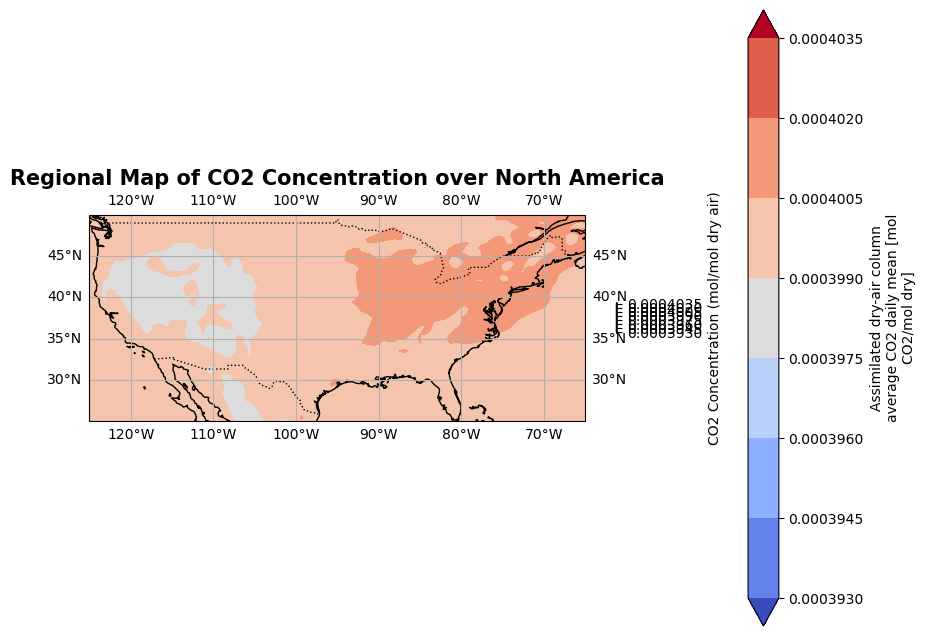

In [7]:
#2.2Make a regional map of the same variable. Your figure should contain: a different project, x label and ticks, y label and ticks, title, gridlines, legend, colorbar, masks or features, annotations, and text box (1 point each).
import xarray as xr
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

# 加载 NetCDF 文件
file_path = r'D:\GitKraken\ese5023\assignment\assignment4\output_file\oco2_GEOS_L3CO2_month_201501_B10206Ar.nc4'
ds = xr.open_dataset(file_path)

# 选择变量，并选择时间的第一个切片
variable = ds['XCO2'].sel(time=ds['time'].values[0])

# 创建区域地图
fig, ax = plt.subplots(figsize=(10, 8), subplot_kw={'projection': ccrs.PlateCarree()})

# 设置区域地图的经纬度范围，这里以北美洲为例
ax.set_extent([-125, -65, 25, 50], crs=ccrs.PlateCarree())

# 绘制变量
contourf = variable.plot.contourf(ax=ax, cmap='coolwarm', extend='both', transform=ccrs.PlateCarree())

# 添加特征：海岸线、国家边界、陆地和海洋
ax.coastlines()
ax.add_feature(cfeature.BORDERS, linestyle=':')
ax.add_feature(cfeature.LAND, facecolor='tan')
ax.add_feature(cfeature.OCEAN, facecolor='skyblue')

# 添加网格线
ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False)

# 添加颜色条
cbar = plt.colorbar(contourf, ax=ax, orientation='vertical', shrink=0.05, aspect=30)
cbar.set_label('CO2 Concentration (mol/mol dry air)')

# 添加标题
ax.set_title('Regional Map of CO2 Concentration over North America', fontsize=15, fontweight='bold')

# 添加坐标轴标签
ax.set_xlabel('Longitude', fontsize=12)
ax.set_ylabel('Latitude', fontsize=12)

# 添加注释和文本框（如果需要）
# ax.text(-100, 35, 'North America', transform=ccrs.Geodetic(), fontsize=12, bbox=dict(facecolor='white', alpha=0.5))

# 显示地图
plt.show()